In [212]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt

In [213]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  
y_train = np.array([0, 0, 0, 1, 1, 1])                                           
w_tmp = np.array([1.,1.])
b_tmp = -3

## Defining the function

In [214]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [215]:
def f_wb(w, b, x):
    if x.ndim == 1:
        return sigmoid(np.dot(w, x) + b)
    elif x.ndim > 1:
        return (sigmoid(np.sum(w * x, axis = 1) + b)).reshape(-1, 1)
    
    return w * x + b

In [216]:
f_wb(w_tmp, b_tmp, X_train)

array([[0.26894142],
       [0.26894142],
       [0.26894142],
       [0.62245933],
       [0.73105858],
       [0.62245933]])

## Loss function (BinaryCrossentropy)

Note: We have to reshape our inputs to ensure that concatenation happens as intended

In [217]:
def BinaryCrossentropy(y_pred, y_true):
    m = len(y_true)

    # Reshaping
    y_pred = y_pred.reshape(-1, 1)
    y_true = y_true.reshape(-1, 1)

    return np.sum(-y_true * np.log(y_pred) - (1. - y_true) * np.log(1. - y_pred)) / m

Checking the implementation of `BinaryCrossentropy` function

In [218]:
BinaryCrossentropy(f_wb(w_tmp, b_tmp, X_train), y_train)

0.36686678640551745

## Gradient for logistic regression

In [219]:
def Gradient(w_in = None, b_in = None, function = f_wb, x = None, y = None):
    w = w_in
    b = b_in
    m = len(y)
    f = function
    y = y.reshape(-1, 1)

    df_dw = np.sum((f(w, b, x) - y) * x, axis = 0) / m
    df_db = np.sum(f(w, b, x) - y) / m

    return df_dw, df_db

Checking the implementation of `Gradient` function

In [220]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
df_dw, df_db = Gradient(w_tmp, b_tmp, f_wb, X_tmp, y_tmp)
print(df_dw, df_db)

[0.49833339 0.49883943] 0.49861806546328574


## Gradient descent for logistic regression

In [221]:
def GradentDescentLogistic(w_in = None, b_in = None, function = f_wb, learning_rate = 0.001, x = None, y = None, iterations = 1000, verbose = 0):
    w = copy.deepcopy(w_in)
    b = b_in
    f = function
    a = learning_rate
    loss = []

    for i in range(iterations):
        df_dw, df_db = Gradient(w, b, f, x, y)
        w = w - a * df_dw
        b = b - a * df_db
        loss.append(BinaryCrossentropy(f(w, b, x), y))
        
        if verbose == 1:
            if i % math.floor(iterations / 10) == 0:
                print(f"Iteration {i}    Loss: " + str(BinaryCrossentropy(f(w, b, x), y)))

    return w, b, loss

In [222]:
w_tmp = np.zeros_like(X_train[-1])
b_tmp = 0.
a = 0.1
iterations = 10000

w_trained, b_trained, loss = GradentDescentLogistic(w_tmp, b_tmp, f_wb, a, X_train, y_train, iterations, verbose = 1)
print(f"\nTrained parameters: w = {w_trained} and b = {b_trained}")

Iteration 0    Loss: 0.684610468560574
Iteration 1000    Loss: 0.1590977666870457
Iteration 2000    Loss: 0.08460064176930078
Iteration 3000    Loss: 0.05705327279402531
Iteration 4000    Loss: 0.04290759421682
Iteration 5000    Loss: 0.03433847729884557
Iteration 6000    Loss: 0.02860379802212006
Iteration 7000    Loss: 0.02450156960879306
Iteration 8000    Loss: 0.02142370332569295
Iteration 9000    Loss: 0.019030137124109114

Trained parameters: w = [5.28123029 5.07815608] and b = -14.222409982019837


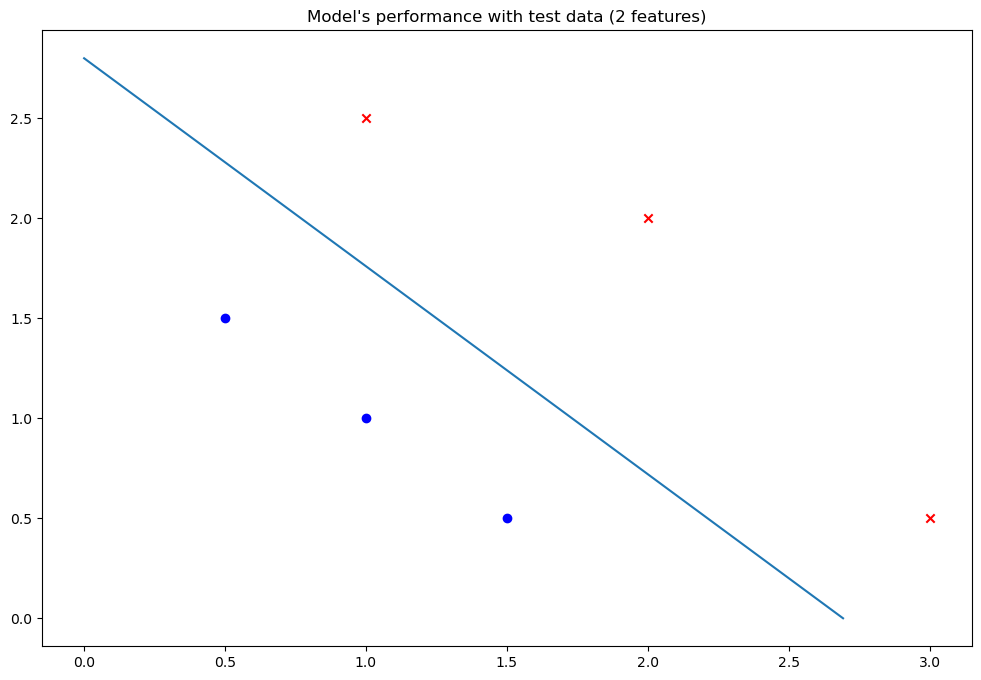

In [223]:
plt.figure(figsize=(12, 8))
m = len(y_train)
for i in range(m):
    if y_train[i]:
        plt.scatter(X_train[i,0], X_train[i,1], c = "r", marker="x")
    else:
        plt.scatter(X_train[i,0], X_train[i,1], c = "b", marker="o")
x_2_bound = [0, -b_trained / w_trained[1]]
x_1_bound = [-b_trained / w_trained[0], 0]
plt.plot(x_1_bound, x_2_bound)
plt.title("Model's performance with test data (2 features)")
plt.show();